# Data Acquisition,Merging and cleaning.

In [1]:
import pandas as pd

# Loading the Excel file using the openpyxl engine
file_path = 'real_economic_indicators_dataset.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Saving the cleaned dataset to a new Excel file
cleaned_file_path = 'cleaned_real_economic_indicators_dataset.xlsx'
df.to_excel(cleaned_file_path, index=False)

## Handling Outliers and Saving Cleaned Dataset

In [2]:
# Selected only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Saving the cleaned dataset to a new Excel file
cleaned_outliers_file_path = 'cleaned_real_economic_indicators_dataset_outliers_handled.xlsx'
df.to_excel(cleaned_outliers_file_path, index=False)

print(f"Cleaned dataset with outliers handled saved to: {cleaned_outliers_file_path}")

Cleaned dataset with outliers handled saved to: cleaned_real_economic_indicators_dataset_outliers_handled.xlsx


italicized text## Checking for Missing Values

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
Date                          0
CPI                           0
interbank_call_rate           0
monetary_policy_rate          0
treasury_bill_rate            0
Interest_rate                 0
prime_lending_rate            0
exchange_rate_naira_to_usd    0
money_supply                  0
currency_in_circulation       0
dtype: int64


## Summary Statistics for each column

In [4]:
# Displaying summary statistics for numerical columns
display(df.describe())

,Date,CPI,interbank_call_rate,monetary_policy_rate,treasury_bill_rate,Interest_rate,prime_lending_rate,exchange_rate_naira_to_usd,money_supply,currency_in_circulation
count,231,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,2.310000e+02,2.310000e+02
mean,2015-08-01 11:44:24.935064832,13.430996,11.743247,11.948864,8.327706,7.869307,16.021126,275.248268,2.465388e+07,1.858215e+06
min,2006-01-01 00:00:00,5.400000,0.000000,3.687500,0.000000,2.460000,12.145000,117.025000,2.227473e+06,5.616264e+05
25%,2010-10-16 12:00:00,10.050000,7.285000,9.875000,4.400000,6.600000,15.115000,152.300000,1.137272e+07,1.168438e+06
50%,2015-08-01 00:00:00,12.500000,10.710000,12.000000,8.580000,8.270000,16.540000,198.800000,1.896553e+07,1.637496e+06
75%,2020-05-16 12:00:00,16.450000,14.835000,14.000000,11.230000,9.360000,17.095000,360.000000,3.265634e+07,2.304112e+06
max,2025-03-01 00:00:00,26.050000,26.160000,20.187500,18.300000,13.500000,19.660000,671.550000,6.458178e+07,4.007623e+06
std,NaN,5.076620,6.931344,3.912056,4.562605,2.642456,1.875710,163.579763,1.792893e+07,8.960806e+05


## Time Series Plots

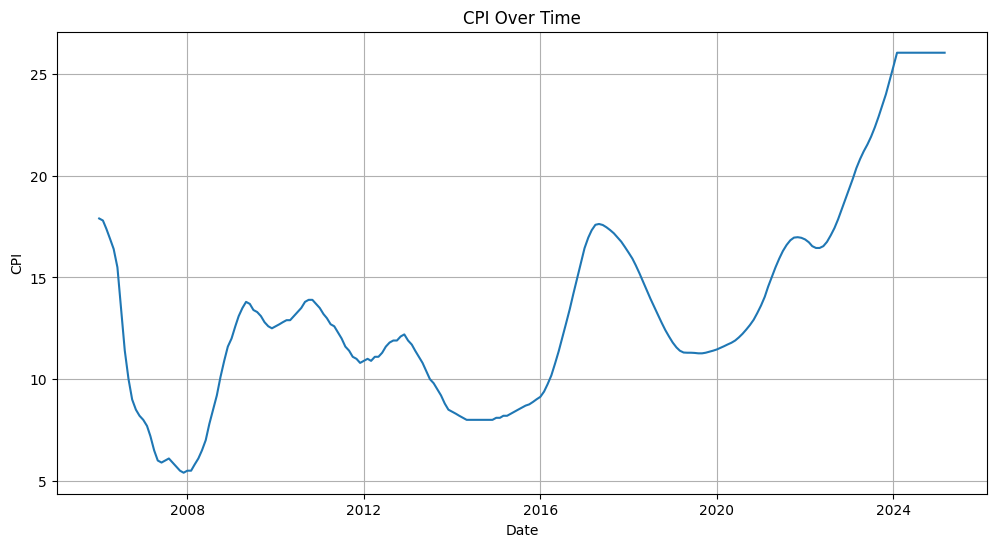

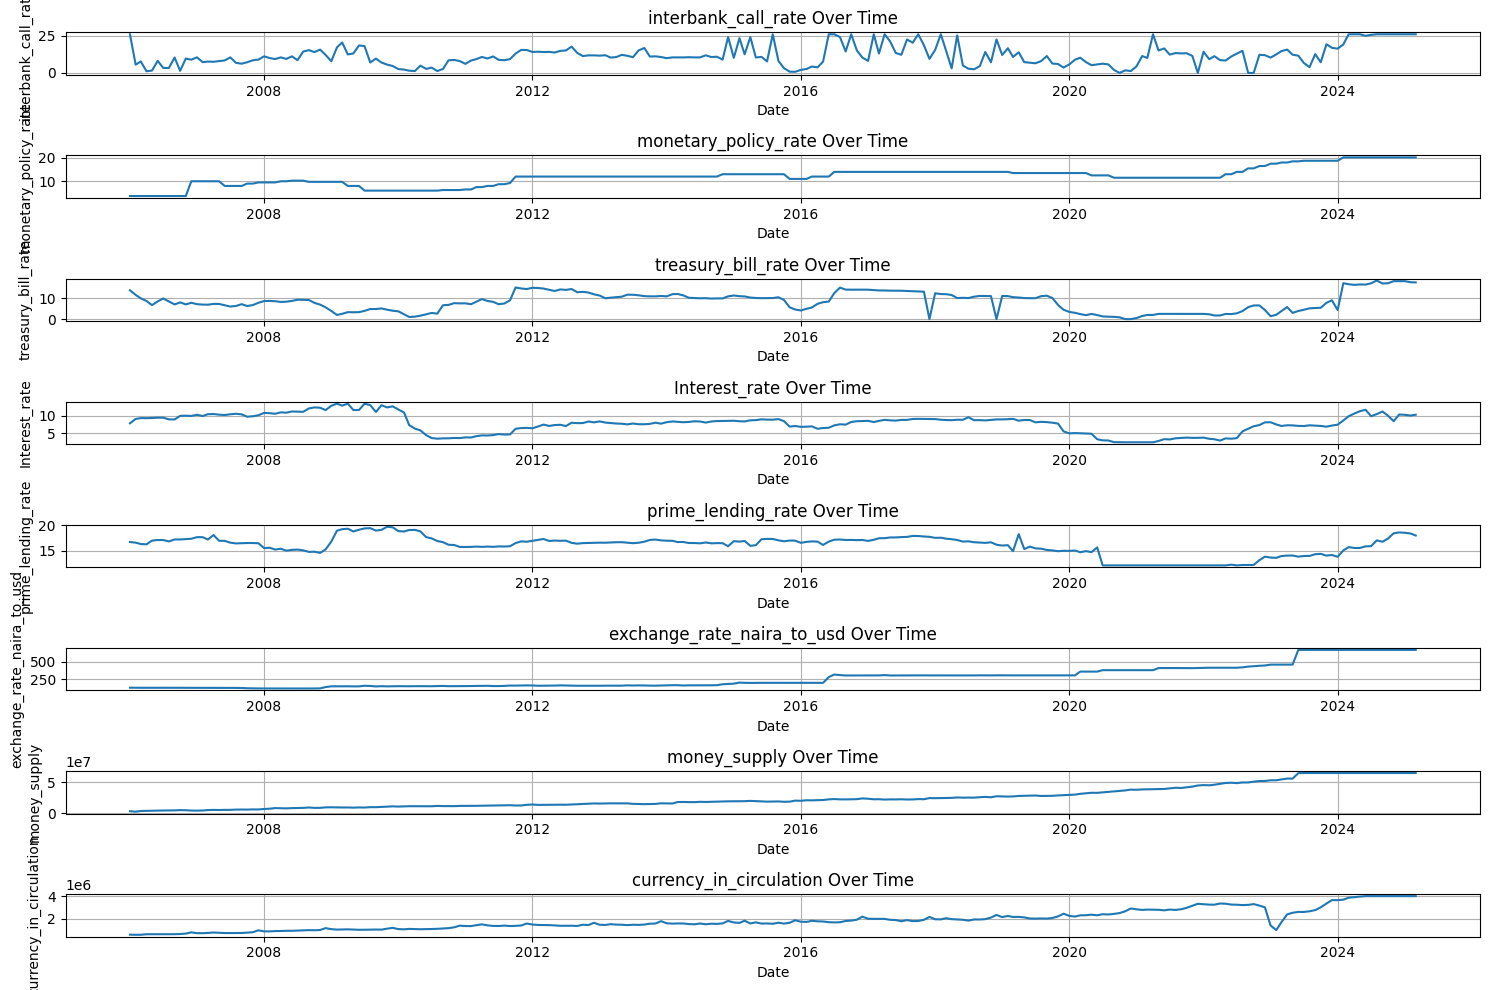

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the Date column as the index for time series plotting
df_time_series = df.set_index('Date')

# Plotting CPI over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time_series, y='CPI', x=df_time_series.index)
plt.title('CPI Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.grid(True)
plt.show()

# Plotting other key variables over time
key_variables = ['interbank_call_rate', 'monetary_policy_rate', 'treasury_bill_rate', 'Interest_rate', 'prime_lending_rate', 'exchange_rate_naira_to_usd', 'money_supply', 'currency_in_circulation']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_variables):
    plt.subplot(len(key_variables), 1, i + 1)
    sns.lineplot(data=df_time_series, y=col, x=df_time_series.index)
    plt.title(f'{col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Correlation Heatmap

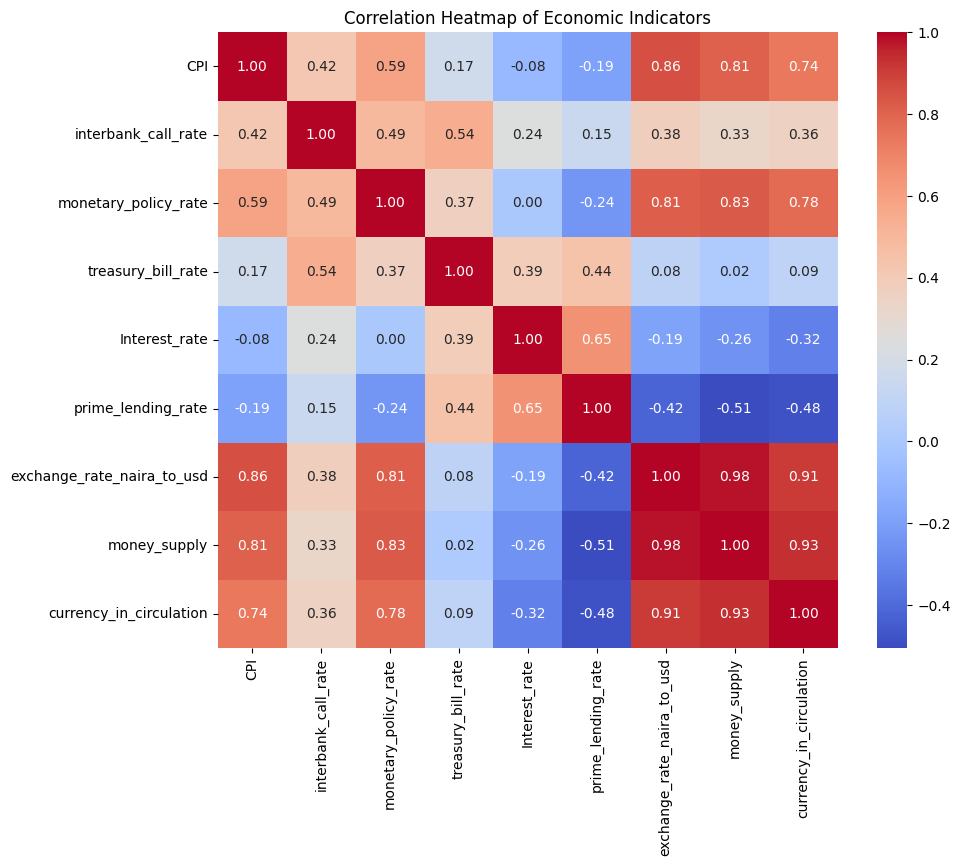

In [6]:
# Calculating the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()

## Pair Plots for Key Variables

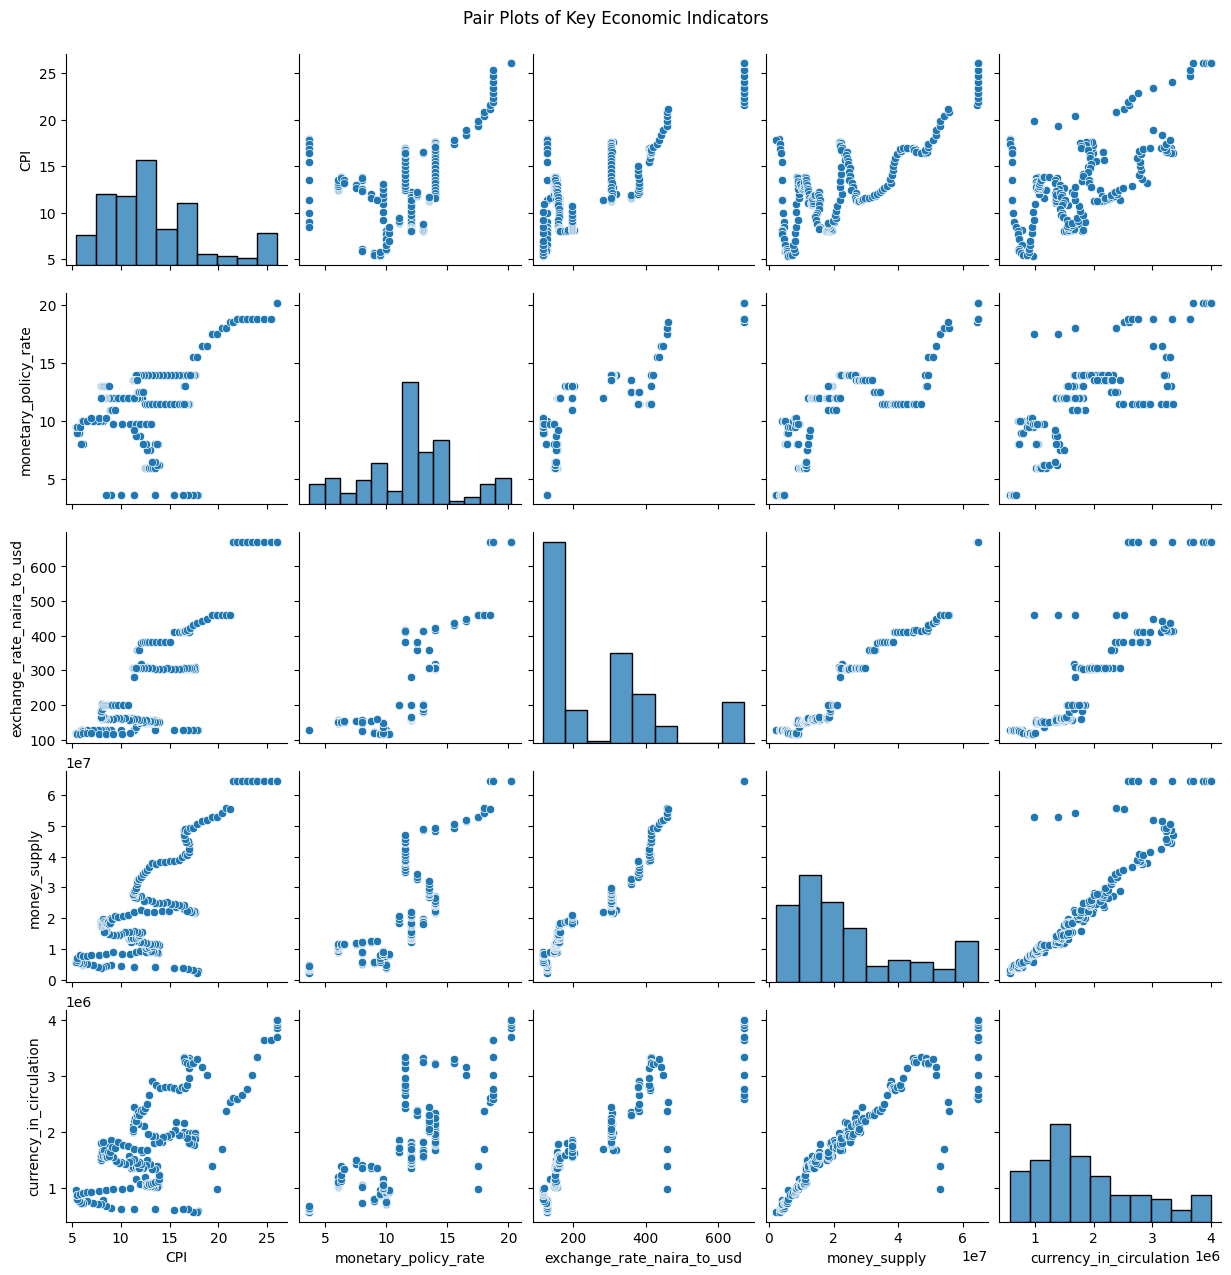

In [7]:
# Selected key variables for pair plotting
key_variables_for_pairplot = ['CPI', 'monetary_policy_rate', 'exchange_rate_naira_to_usd', 'money_supply', 'currency_in_circulation']

# Creating pair plots
sns.pairplot(df[key_variables_for_pairplot])
plt.suptitle('Pair Plots of Key Economic Indicators', y=1.02)
plt.show()

## Creating 3-month and 6-month lagged features for relevant variables.


In [8]:
# Created a new DataFrame by copying the existing DataFrame df
df_featured = df.copy()

# Identifying the columns for which lagged features should be created (numerical columns excluding Date)
numerical_cols = df_featured.select_dtypes(include=['number']).columns

# Creating lagged features
lags = [3, 6]
for col in numerical_cols:
    for lag in lags:
        df_featured[f'{col}_lag_{lag}'] = df_featured[col].shift(lag)

# Display the first five rows of the new DataFrame with lagged features
display(df_featured.head())

,Date,CPI,interbank_call_rate,monetary_policy_rate,treasury_bill_rate,Interest_rate,prime_lending_rate,exchange_rate_naira_to_usd,money_supply,currency_in_circulation,...,Interest_rate_lag_3,Interest_rate_lag_6,prime_lending_rate_lag_3,prime_lending_rate_lag_6,exchange_rate_naira_to_usd_lag_3,exchange_rate_naira_to_usd_lag_6,money_supply_lag_3,money_supply_lag_6,currency_in_circulation_lag_3,currency_in_circulation_lag_6
0,2006-01-01,17.9,26.16,3.6875,13.68,7.88,16.69,129.250,2967139.5,572747.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-02-01,17.8,5.59,3.6875,11.49,9.13,16.57,128.250,2227472.8,561626.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-01,17.4,7.77,3.6875,9.86,9.37,16.30,128.000,3307667.9,563713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-04-01,16.9,1.13,3.6875,8.60,9.35,16.25,128.375,3540703.6,610130.3,...,7.88,NaN,16.69,NaN,129.25,NaN,2967139.5,NaN,572747.4,NaN
4,2006-05-01,16.4,1.57,3.6875,6.65,9.40,16.97,128.750,3684404.5,611224.3,...,9.13,NaN,16.57,NaN,128.25,NaN,2227472.8,NaN,561626.4,NaN


## Creating 3-month moving averages for relevant variables.


In [9]:
# Identifying the original numerical columns (excluding Date and the newly created lagged columns)
original_numerical_cols = df.select_dtypes(include=['number']).columns

# Calculating 3-month moving averages for each original numerical column
for col in original_numerical_cols:
    df_featured[f'{col}_rolling_mean_3m'] = df_featured[col].rolling(window=3, min_periods=1).mean()

# Displaying the first few rows of the df_featured DataFrame to show the new moving average columns
display(df_featured.head())

,Date,CPI,interbank_call_rate,monetary_policy_rate,treasury_bill_rate,Interest_rate,prime_lending_rate,exchange_rate_naira_to_usd,money_supply,currency_in_circulation,...,currency_in_circulation_lag_6,CPI_rolling_mean_3m,interbank_call_rate_rolling_mean_3m,monetary_policy_rate_rolling_mean_3m,treasury_bill_rate_rolling_mean_3m,Interest_rate_rolling_mean_3m,prime_lending_rate_rolling_mean_3m,exchange_rate_naira_to_usd_rolling_mean_3m,money_supply_rolling_mean_3m,currency_in_circulation_rolling_mean_3m
0,2006-01-01,17.9,26.16,3.6875,13.68,7.88,16.69,129.250,2967139.5,572747.4,...,NaN,17.900000,26.160000,3.6875,13.680000,7.880000,16.690000,129.250000,2.967140e+06,572747.400000
1,2006-02-01,17.8,5.59,3.6875,11.49,9.13,16.57,128.250,2227472.8,561626.4,...,NaN,17.850000,15.875000,3.6875,12.585000,8.505000,16.630000,128.750000,2.597306e+06,567186.900000
2,2006-03-01,17.4,7.77,3.6875,9.86,9.37,16.30,128.000,3307667.9,563713.0,...,NaN,17.700000,13.173333,3.6875,11.676667,8.793333,16.520000,128.500000,2.834093e+06,566028.933333
3,2006-04-01,16.9,1.13,3.6875,8.60,9.35,16.25,128.375,3540703.6,610130.3,...,NaN,17.366667,4.830000,3.6875,9.983333,9.283333,16.373333,128.208333,3.025281e+06,578489.900000
4,2006-05-01,16.4,1.57,3.6875,6.65,9.40,16.97,128.750,3684404.5,611224.3,...,NaN,16.900000,3.490000,3.6875,8.370000,9.373333,16.506667,128.375000,3.510925e+06,595022.533333


## Handling missing values emanating(from feature engineering)



In [10]:
# Checking for missing values in the df_featured DataFrame
missing_values_featured = df_featured.isnull().sum()

# Displaying the count of missing values for each column
print("Missing values per column in df_featured:")
print(missing_values_featured)

Missing values per column in df_featured:
Date                                          0
CPI                                           0
interbank_call_rate                           0
monetary_policy_rate                          0
treasury_bill_rate                            0
Interest_rate                                 0
prime_lending_rate                            0
exchange_rate_naira_to_usd                    0
money_supply                                  0
currency_in_circulation                       0
CPI_lag_3                                     3
CPI_lag_6                                     6
interbank_call_rate_lag_3                     3
interbank_call_rate_lag_6                     6
monetary_policy_rate_lag_3                    3
monetary_policy_rate_lag_6                    6
treasury_bill_rate_lag_3                      3
treasury_bill_rate_lag_6                      6
Interest_rate_lag_3                           3
Interest_rate_lag_6                           

Dropping missing values

In [11]:
# Dropped rows with missing values
df_featured.dropna(inplace=True)

# Verify that the missing values have been handled
missing_values_after_drop = df_featured.isnull().sum()
print("\nMissing values per column in df_featured after dropping rows:")
print(missing_values_after_drop)

# Display the first few rows of the DataFrame after dropping NaNs
display(df_featured.head())


Missing values per column in df_featured after dropping rows:
Date                                          0
CPI                                           0
interbank_call_rate                           0
monetary_policy_rate                          0
treasury_bill_rate                            0
Interest_rate                                 0
prime_lending_rate                            0
exchange_rate_naira_to_usd                    0
money_supply                                  0
currency_in_circulation                       0
CPI_lag_3                                     0
CPI_lag_6                                     0
interbank_call_rate_lag_3                     0
interbank_call_rate_lag_6                     0
monetary_policy_rate_lag_3                    0
monetary_policy_rate_lag_6                    0
treasury_bill_rate_lag_3                      0
treasury_bill_rate_lag_6                      0
Interest_rate_lag_3                           0
Interest_rate_lag_6      

,Date,CPI,interbank_call_rate,monetary_policy_rate,treasury_bill_rate,Interest_rate,prime_lending_rate,exchange_rate_naira_to_usd,money_supply,currency_in_circulation,...,currency_in_circulation_lag_6,CPI_rolling_mean_3m,interbank_call_rate_rolling_mean_3m,monetary_policy_rate_rolling_mean_3m,treasury_bill_rate_rolling_mean_3m,Interest_rate_rolling_mean_3m,prime_lending_rate_rolling_mean_3m,exchange_rate_naira_to_usd_rolling_mean_3m,money_supply_rolling_mean_3m,currency_in_circulation_rolling_mean_3m
6,2006-07-01,13.5,3.37,3.6875,9.79,9.49,17.08,128.25,4109850.4,606859.5,...,572747.4,15.133333,4.366667,3.6875,8.283333,9.460000,17.043333,128.416667,3.902025e+06,606970.933333
7,2006-08-01,11.4,3.33,3.6875,8.40,9.00,16.81,128.15,4189053.5,609346.6,...,561626.4,13.466667,4.953333,3.6875,8.866667,9.326667,16.990000,128.216667,4.070242e+06,606345.033333
8,2006-09-01,10.0,10.45,3.6875,6.98,8.98,17.19,128.35,4320672.3,615140.9,...,563713.0,11.633333,5.716667,3.6875,8.390000,9.156667,17.026667,128.250000,4.206525e+06,610449.000000
9,2006-10-01,9.0,1.40,3.6875,7.94,10.01,17.19,128.25,4730662.8,629511.2,...,610130.3,10.133333,5.060000,3.6875,7.773333,9.330000,17.063333,128.250000,4.413463e+06,617999.566667
10,2006-11-01,8.5,9.70,3.6875,7.00,10.05,17.26,128.25,4557557.2,669521.0,...,611224.3,9.166667,7.183333,3.6875,7.306667,9.680000,17.213333,128.283333,4.536297e+06,638057.700000


Scaling




In [12]:
from sklearn.preprocessing import StandardScaler

# Selected numerical columns for scaling, excluding the 'Date' column
numerical_cols_to_scale = df_featured.select_dtypes(include=['number']).columns

# Instantiating StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df_featured[numerical_cols_to_scale] = scaler.fit_transform(df_featured[numerical_cols_to_scale])

# Display the head of the df_featured DataFrame to verify scaling
display(df_featured.head())

,Date,CPI,interbank_call_rate,monetary_policy_rate,treasury_bill_rate,Interest_rate,prime_lending_rate,exchange_rate_naira_to_usd,money_supply,currency_in_circulation,...,currency_in_circulation_lag_6,CPI_rolling_mean_3m,interbank_call_rate_rolling_mean_3m,monetary_policy_rate_rolling_mean_3m,treasury_bill_rate_rolling_mean_3m,Interest_rate_rolling_mean_3m,prime_lending_rate_rolling_mean_3m,exchange_rate_naira_to_usd_rolling_mean_3m,money_supply_rolling_mean_3m,currency_in_circulation_rolling_mean_3m
6,2006-07-01,0.032123,-1.235389,-2.285197,0.326911,0.621121,0.568140,-0.922476,-1.187641,-1.458490,...,-1.473912,0.367170,-1.267982,-2.27707,0.008495,0.619601,0.561253,-0.918950,-1.194069,-1.465277
7,2006-08-01,-0.379876,-1.241228,-2.285197,0.024189,0.437068,0.425506,-0.923087,-1.183186,-1.455667,...,-1.487259,0.035062,-1.167131,-2.27707,0.142016,0.568830,0.532566,-0.920189,-1.184528,-1.465999
8,2006-09-01,-0.654541,-0.201821,-2.285197,-0.285067,0.429556,0.626250,-0.921864,-1.175783,-1.449092,...,-1.484755,-0.330257,-1.035910,-2.27707,0.032910,0.504096,0.552288,-0.919982,-1.176798,-1.461264
9,2006-10-01,-0.850731,-1.522977,-2.285197,-0.075993,0.816442,0.626250,-0.922476,-1.152721,-1.432785,...,-1.429049,-0.629154,-1.148794,-2.27707,-0.108242,0.570099,0.572010,-0.919982,-1.165060,-1.452553
10,2006-11-01,-0.948826,-0.311309,-2.285197,-0.280711,0.831467,0.663229,-0.922476,-1.162458,-1.387382,...,-1.427736,-0.821777,-0.783783,-2.27707,-0.215059,0.703375,0.652692,-0.919776,-1.158093,-1.429411


Saving final dataset


In [13]:
# Save the df_featured DataFrame to a new Excel file
output_file_path = 'featured_scaled_economic_indicators.xlsx'
df_featured.to_excel(output_file_path, index=False)

# Print a confirmation message
print(f"Cleaned, featured, and scaled dataset saved to: {output_file_path}")

Cleaned, featured, and scaled dataset saved to: featured_scaled_economic_indicators.xlsx


Post Feature Engineering EDA

In [14]:
# Loading the dataset with engineered and scaled features
df_featured_scaled = pd.read_excel('featured_scaled_economic_indicators.xlsx', engine='openpyxl')

# Display the first 5 rows of the DataFrame
display(df_featured_scaled.head())

# Display information about the DataFrame
df_featured_scaled.info()

,Date,CPI,interbank_call_rate,monetary_policy_rate,treasury_bill_rate,Interest_rate,prime_lending_rate,exchange_rate_naira_to_usd,money_supply,currency_in_circulation,...,currency_in_circulation_lag_6,CPI_rolling_mean_3m,interbank_call_rate_rolling_mean_3m,monetary_policy_rate_rolling_mean_3m,treasury_bill_rate_rolling_mean_3m,Interest_rate_rolling_mean_3m,prime_lending_rate_rolling_mean_3m,exchange_rate_naira_to_usd_rolling_mean_3m,money_supply_rolling_mean_3m,currency_in_circulation_rolling_mean_3m
0,2006-07-01,0.032123,-1.235389,-2.285197,0.326911,0.621121,0.568140,-0.922476,-1.187641,-1.458490,...,-1.473912,0.367170,-1.267982,-2.27707,0.008495,0.619601,0.561253,-0.918950,-1.194069,-1.465277
1,2006-08-01,-0.379876,-1.241228,-2.285197,0.024189,0.437068,0.425506,-0.923087,-1.183186,-1.455667,...,-1.487259,0.035062,-1.167131,-2.27707,0.142016,0.568830,0.532566,-0.920189,-1.184528,-1.465999
2,2006-09-01,-0.654541,-0.201821,-2.285197,-0.285067,0.429556,0.626250,-0.921864,-1.175783,-1.449092,...,-1.484755,-0.330257,-1.035910,-2.27707,0.032910,0.504096,0.552288,-0.919982,-1.176798,-1.461264
3,2006-10-01,-0.850731,-1.522977,-2.285197,-0.075993,0.816442,0.626250,-0.922476,-1.152721,-1.432785,...,-1.429049,-0.629154,-1.148794,-2.27707,-0.108242,0.570099,0.572010,-0.919982,-1.165060,-1.452553
4,2006-11-01,-0.948826,-0.311309,-2.285197,-0.280711,0.831467,0.663229,-0.922476,-1.162458,-1.387382,...,-1.427736,-0.821777,-0.783783,-2.27707,-0.215059,0.703375,0.652692,-0.919776,-1.158093,-1.429411


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        225 non-null    datetime64[ns]
 1   CPI                                         225 non-null    float64       
 2   interbank_call_rate                         225 non-null    float64       
 3   monetary_policy_rate                        225 non-null    float64       
 4   treasury_bill_rate                          225 non-null    float64       
 5   Interest_rate                               225 non-null    float64       
 6   prime_lending_rate                          225 non-null    float64       
 7   exchange_rate_naira_to_usd                  225 non-null    float64       
 8   money_supply                                225 non-null    float64       
 9   currency_i

Calculating Correlation with cpi



Correlations with CPI (Sorted Descending):
CPI                                           1.000000
CPI_rolling_mean_3m                           0.997180
CPI_lag_3                                     0.974572
CPI_lag_6                                     0.905257
exchange_rate_naira_to_usd_rolling_mean_3m    0.892684
exchange_rate_naira_to_usd_lag_3              0.891975
exchange_rate_naira_to_usd                    0.889287
exchange_rate_naira_to_usd_lag_6              0.885936
money_supply_lag_6                            0.869377
money_supply_lag_3                            0.863714
money_supply_rolling_mean_3m                  0.858212
money_supply                                  0.854757
currency_in_circulation_rolling_mean_3m       0.793495
currency_in_circulation                       0.791434
currency_in_circulation_lag_3                 0.777871
currency_in_circulation_lag_6                 0.762052
monetary_policy_rate_rolling_mean_3m          0.673816
monetary_policy_rate  

/tmp/ipython-input-812124613.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cpi_correlations.index, y=cpi_correlations.values, palette='viridis')


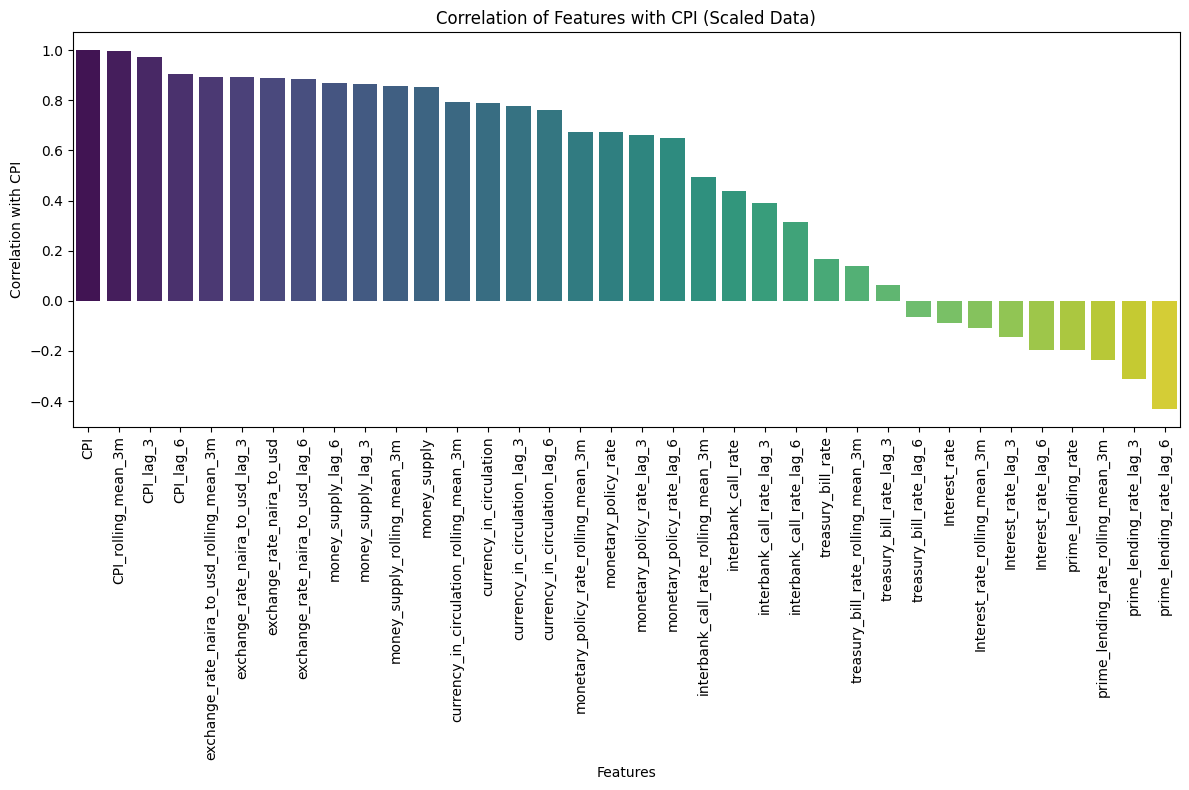

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the correlation matrix for the df_featured_scaled DataFrame
correlation_matrix_scaled = df_featured_scaled.corr(numeric_only=True)

# Extract the correlations of all features with the 'CPI' column
cpi_correlations = correlation_matrix_scaled['CPI'].sort_values(ascending=False)

# Print the sorted correlations
print("Correlations with CPI (Sorted Descending):")
print(cpi_correlations)

# Create a bar plot of the correlations with 'CPI'
plt.figure(figsize=(12, 8))
sns.barplot(x=cpi_correlations.index, y=cpi_correlations.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Correlation of Features with CPI (Scaled Data)')
plt.xlabel('Features')
plt.ylabel('Correlation with CPI')
plt.tight_layout()
plt.show()

Feature variance check

In [16]:
# Selected only numerical columns for variance calculation, excluding the 'Date' column
numerical_cols_scaled = df_featured_scaled.select_dtypes(include=['number']).columns

# Calculating the variance for each numerical column
feature_variances = df_featured_scaled[numerical_cols_scaled].var()

# Print the variance for each column
print("Variance of Scaled Features:")
print(feature_variances)

# Identifying features with very low variance (e.g., variance close to zero)
low_variance_features = feature_variances[feature_variances < 1e-6] # Using a small threshold
print("\nFeatures with Very Low Variance:")
print(low_variance_features)

Variance of Scaled Features:
CPI                                           1.004464
interbank_call_rate                           1.004464
monetary_policy_rate                          1.004464
treasury_bill_rate                            1.004464
Interest_rate                                 1.004464
prime_lending_rate                            1.004464
exchange_rate_naira_to_usd                    1.004464
money_supply                                  1.004464
currency_in_circulation                       1.004464
CPI_lag_3                                     1.004464
CPI_lag_6                                     1.004464
interbank_call_rate_lag_3                     1.004464
interbank_call_rate_lag_6                     1.004464
monetary_policy_rate_lag_3                    1.004464
monetary_policy_rate_lag_6                    1.004464
treasury_bill_rate_lag_3                      1.004464
treasury_bill_rate_lag_6                      1.004464
Interest_rate_lag_3                 

Visualizing the distribution of the new features



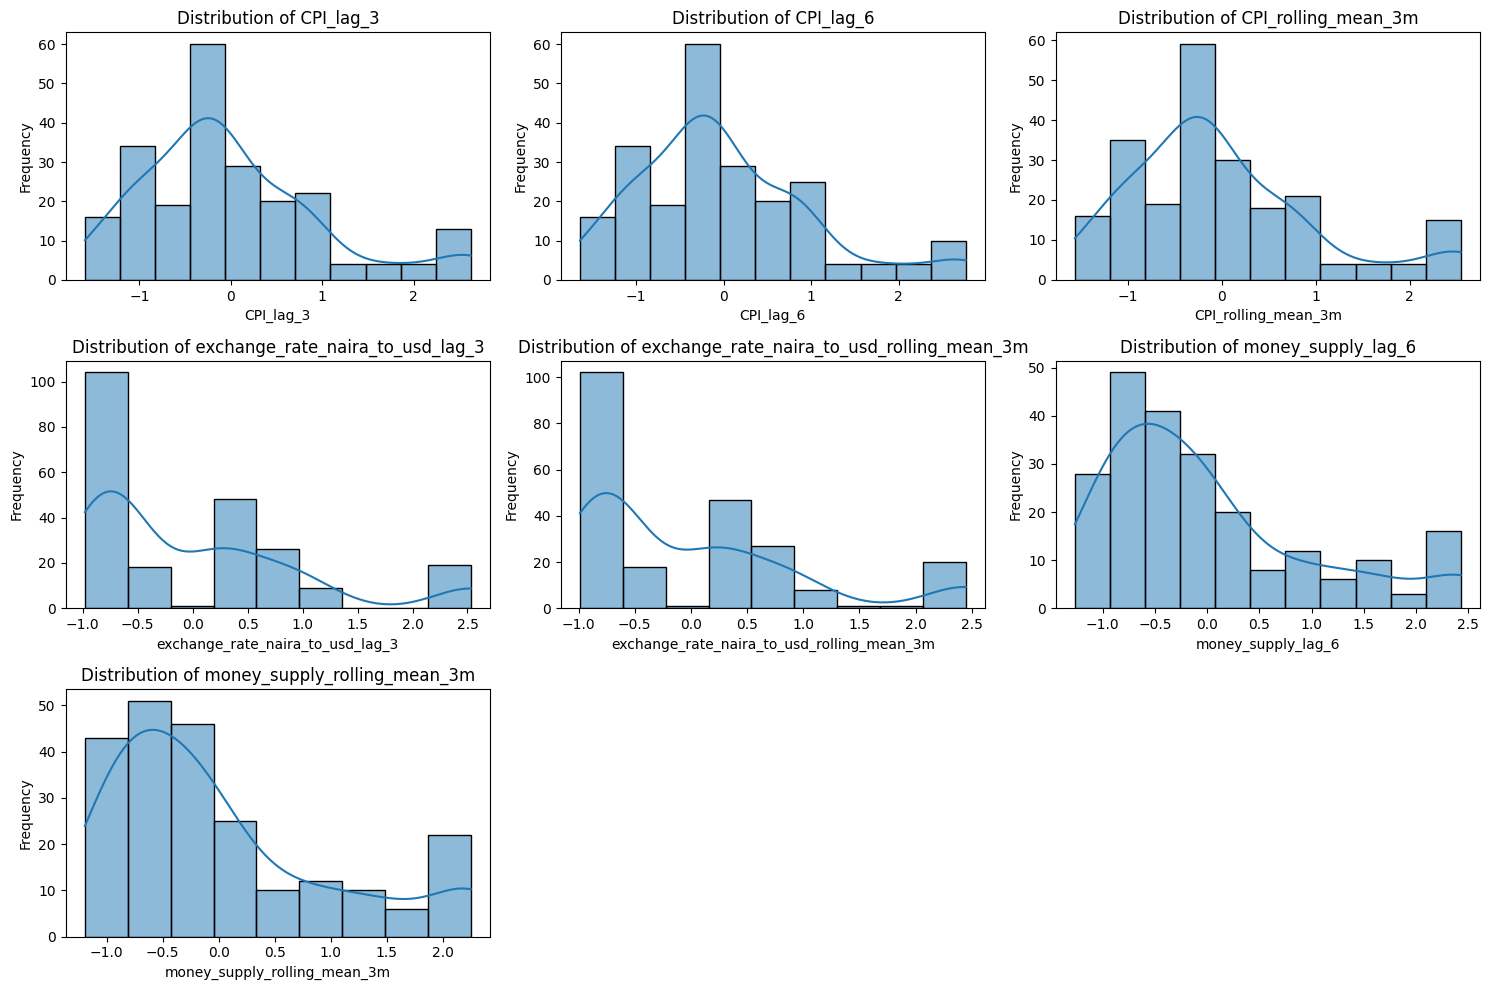

In [17]:
# Select a subset of engineered features for visualization
engineered_features_subset = [
    'CPI_lag_3',
    'CPI_lag_6',
    'CPI_rolling_mean_3m',
    'exchange_rate_naira_to_usd_lag_3',
    'exchange_rate_naira_to_usd_rolling_mean_3m',
    'money_supply_lag_6',
    'money_supply_rolling_mean_3m'
]

# Create histograms for the selected features
plt.figure(figsize=(15, 10))
for i, col in enumerate(engineered_features_subset):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df_featured_scaled, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Data Splitting



In [18]:
# Calculating the index for the split
split_index = int(len(df_featured_scaled) * 0.8)

# Separating features (X) and target variable (y)
X = df_featured_scaled.drop(['CPI', 'Date'], axis=1)
y = df_featured_scaled['CPI']

# Splitting the data into training and testing sets
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# Printing the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (180, 35)
Shape of X_test: (45, 35)
Shape of y_train: (180,)
Shape of y_test: (45,)


Defining Ridge model and parameter grid




In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Instantiatiating a Ridge model
ridge_model = Ridge()

# Defining the parameter grid for alpha
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Instantiating TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Printing the model and parameter grid
print("Ridge Model:", ridge_model)
print("Parameter Grid:", param_grid)
print("TimeSeriesSplit object:", tscv)

Ridge Model: Ridge()
Parameter Grid: {'alpha': [0.1, 1.0, 10.0]}
TimeSeriesSplit object: TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [20]:
# Instantiate GridSearchCV with the Ridge model, parameter grid, and TimeSeriesSplit
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=tscv)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters found by GridSearchCV:", grid_search.best_params_)

# Get the best model from GridSearchCV
best_ridge_model = grid_search.best_estimator_

Best hyperparameters found by GridSearchCV: {'alpha': 0.1}



Evaluating the performance of the untuned and tuned Ridge models on the test set and display the metrics in a table.



In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Evaluating the untuned Ridge model using default alpha=1.0
untuned_ridge_model = Ridge()
# Re-instantiating the one before fit
untuned_ridge_model.fit(X_train, y_train)
y_pred_untuned = untuned_ridge_model.predict(X_test)

mae_untuned = mean_absolute_error(y_test, y_pred_untuned)
mse_untuned = mean_squared_error(y_test, y_pred_untuned)
rmse_untuned = np.sqrt(mse_untuned)
r2_untuned = r2_score(y_test, y_pred_untuned)

# Evaluating the tuned Ridge model i.e the best_ridge_model from GridSearchCV)
y_pred_tuned = best_ridge_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Creating a table to display the performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 Score'],
    'Untuned Model': [mae_untuned, mse_untuned, rmse_untuned, r2_untuned],
    'Tuned Model': [mae_tuned, mse_tuned, rmse_tuned, r2_tuned]
})

print("\nPerformance Metrics Before and After Tuning:")
display(performance_metrics)


Performance Metrics Before and After Tuning:


,Metric,Untuned Model,Tuned Model
0,MAE,0.098125,0.068320
1,MSE,0.015507,0.008093
2,RMSE,0.124527,0.089962
3,R2 Score,0.974208,0.986539


Defining SVR(Poly) model and parameter grid


In [22]:
# Calculating the index for the split (80% for training, 20% for testing)
split_index = int(len(df_featured_scaled) * 0.8)

# Separating features (X) and target variable (y)
X = df_featured_scaled.drop(['CPI', 'Date'], axis=1)
y = df_featured_scaled['CPI']

# Splitting the data into training and testing sets
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# Printing the shapes of the training and testing sets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (180, 35)
Shape of X_test: (45, 35)
Shape of y_train: (180,)
Shape of y_test: (45,)


In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Instantiating an SVR model with a polynomial kernel
svr_model = SVR(kernel='poly')

# Defininig an extensive parameter grid for the SVR model
param_grid = {
    'C': [0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'coef0': [-1, -0.5, 0, 0.5, 1]
}


# Instantiating TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Print the model and parameter grid
print("SVR Model:", svr_model)
print("Parameter Grid:", param_grid)
print("TimeSeriesSplit object:", tscv)

SVR Model: SVR(kernel='poly')
Parameter Grid: {'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'], 'epsilon': [0.01, 0.1, 0.2, 0.5], 'coef0': [-1, -0.5, 0, 0.5, 1]}
TimeSeriesSplit object: TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [24]:
# Instantiating GridSearchCV with the SVR model, parameter grid, and TimeSeriesSplit
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_svr.fit(X_train, y_train)

# Printing the best hyperparameters found by GridSearchCV
print("Best hyperparameters found by GridSearchCV:", grid_search_svr.best_params_)

# Get the best model from GridSearchCV
best_svr_model = grid_search_svr.best_estimator_

Best hyperparameters found by GridSearchCV: {'C': 100, 'coef0': 0, 'degree': 1, 'epsilon': 0.01, 'gamma': 'scale'}


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Evaluate the untuned SVR model (using default parameters)
untuned_svr_model = SVR(kernel='poly') # Re-instantiate for untuned evaluation
untuned_svr_model.fit(X_train, y_train)
y_pred_untuned_svr = untuned_svr_model.predict(X_test)

mae_untuned_svr = mean_absolute_error(y_test, y_pred_untuned_svr)
mse_untuned_svr = mean_squared_error(y_test, y_pred_untuned_svr)
rmse_untuned_svr = np.sqrt(mse_untuned_svr)
r2_untuned_svr = r2_score(y_test, y_pred_untuned_svr)

# Evaluate the tuned SVR model (the best_svr_model from GridSearchCV)
y_pred_tuned_svr = best_svr_model.predict(X_test)

mae_tuned_svr = mean_absolute_error(y_test, y_pred_tuned_svr)
mse_tuned_svr = mean_squared_error(y_test, y_pred_tuned_svr)
rmse_tuned_svr = np.sqrt(mse_tuned_svr)
r2_tuned_svr = r2_score(y_test, y_pred_tuned_svr)

# Create a table to display the performance metrics
performance_metrics_svr = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 Score'],
    'Untuned SVR Model': [mae_untuned_svr, mse_untuned_svr, rmse_untuned_svr, r2_untuned_svr],
    'Tuned SVR Model': [mae_tuned_svr, mse_tuned_svr, rmse_tuned_svr, r2_tuned_svr]
})

print("\nPerformance Metrics Before and After Tuning (SVR Model):")
display(performance_metrics_svr)


Performance Metrics Before and After Tuning (SVR Model):


,Metric,Untuned SVR Model,Tuned SVR Model
0,MAE,4.059877,0.026224
1,MSE,27.133695,0.001249
2,RMSE,5.209001,0.035339
3,R2 Score,-44.129708,0.997923


Calculating residuals



In [26]:
# Calculating the predicted values for the test set using the best tuned SVR model
y_pred_tuned_svr = best_svr_model.predict(X_test)

# Calculating the residuals
residuals_svr = y_test - y_pred_tuned_svr

# Printing the first few residuals
print("First few residuals of the tuned SVR model:")
print(residuals_svr.head())

First few residuals of the tuned SVR model:
180    0.008371
181    0.008124
182    0.007165
183    0.004167
184   -0.002437
Name: CPI, dtype: float64


Plot residuals vs predicted




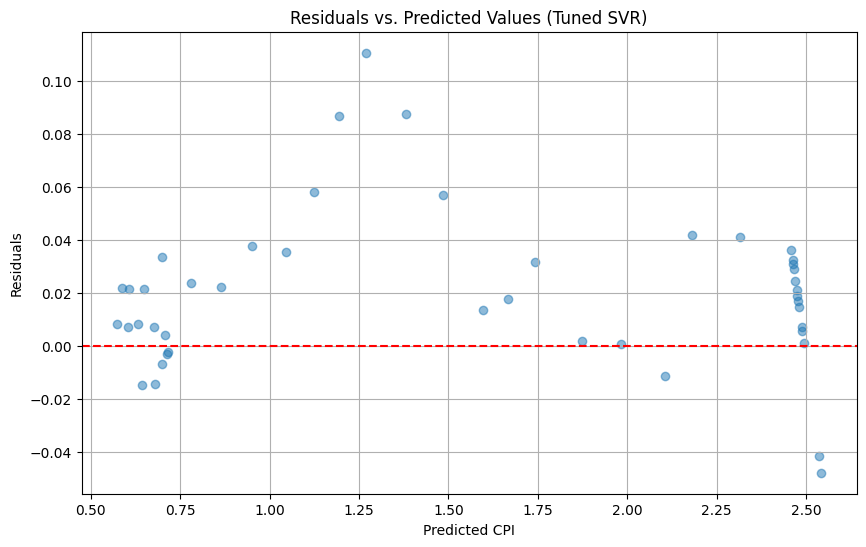

In [27]:
# Creating a scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_tuned_svr, residuals_svr, alpha=0.5)

# Added a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Labeled the axes and add a title
plt.xlabel('Predicted CPI')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Tuned SVR)')

# Added a grid
plt.grid(True)

# Displaying the plot
plt.show()

Autocorrelation Function

<Figure size 1200x600 with 0 Axes>

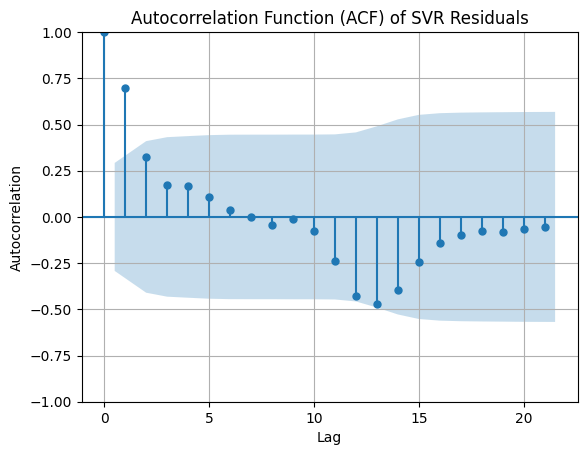

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

# Plotting the Autocorrelation Function (ACF) of the residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals_svr, lags=min(40, len(residuals_svr) // 2 - 1), alpha=0.05)
plt.title('Autocorrelation Function (ACF) of SVR Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

Comparing the training and testing performance metrics to assess for overfitting.



In [29]:
# Compare train and test metrics
print("Train R2 Score:", best_svr_model.score(X_train, y_train))
print("Test R2 Score:", r2_tuned_svr)

from sklearn.metrics import mean_squared_error

y_train_pred_tuned_svr = best_svr_model.predict(X_train)
train_mse_tuned_svr = mean_squared_error(y_train, y_train_pred_tuned_svr)

print("Train MSE:", train_mse_tuned_svr)
print("Test MSE:", mse_tuned_svr)

Train R2 Score: 0.9986987744122353
Test R2 Score: 0.9979228261950978
Train MSE: 0.0004352637998087772
Test MSE: 0.0012488758031541012


Plotting residuals over time


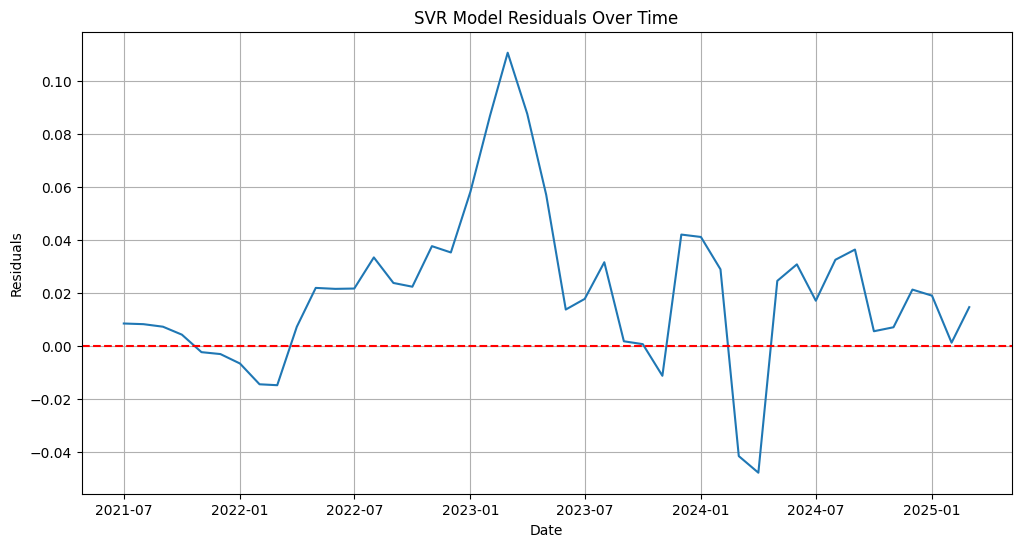

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a time series plot of the residuals
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_featured_scaled['Date'][X_test.index], y=residuals_svr)

# Added a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Labeled the axes and add a title
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('SVR Model Residuals Over Time')

# Add a grid
plt.grid(True)

# Displaying the plot
plt.show()

Comparing train vs test metrics




In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Calculate predicted values for the training set
y_train_pred_tuned_svr = best_svr_model.predict(X_train)

# Calculate performance metrics for the training set
mae_train_tuned_svr = mean_absolute_error(y_train, y_train_pred_tuned_svr)
mse_train_tuned_svr = mean_squared_error(y_train, y_train_pred_tuned_svr)
rmse_train_tuned_svr = np.sqrt(mse_train_tuned_svr)
r2_train_tuned_svr = r2_score(y_train, y_train_pred_tuned_svr)

# Create a table to display the performance metrics for both training and testing sets
performance_metrics_svr_comparison = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 Score'],
    'Training Set': [mae_train_tuned_svr, mse_train_tuned_svr, rmse_train_tuned_svr, r2_train_tuned_svr],
    'Testing Set': [mae_tuned_svr, mse_tuned_svr, rmse_tuned_svr, r2_tuned_svr]
})

print("\nPerformance Metrics Comparison (Tuned SVR Model - Train vs. Test):")
display(performance_metrics_svr_comparison)


Performance Metrics Comparison (Tuned SVR Model - Train vs. Test):


,Metric,Training Set,Testing Set
0,MAE,0.012456,0.026224
1,MSE,0.000435,0.001249
2,RMSE,0.020863,0.035339
3,R2 Score,0.998699,0.997923


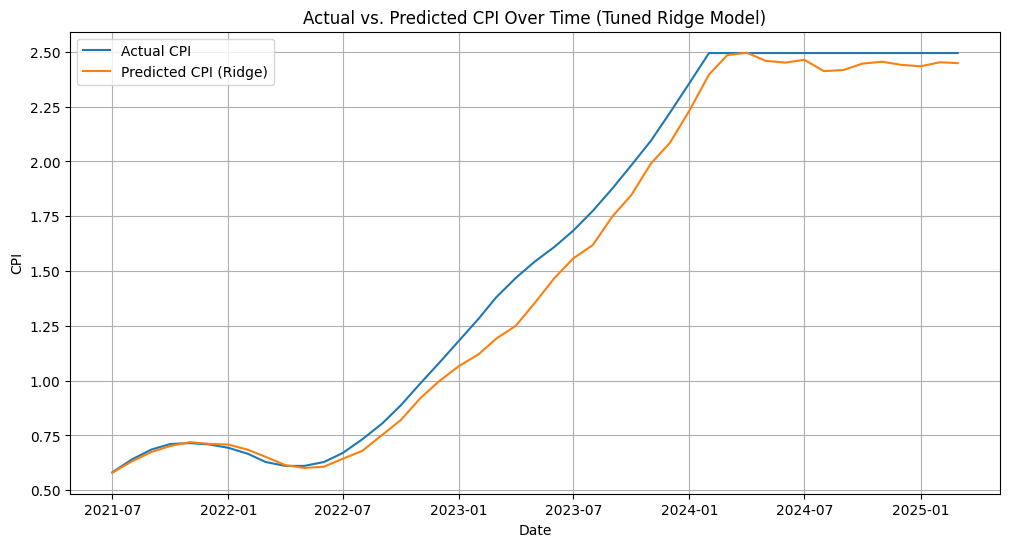

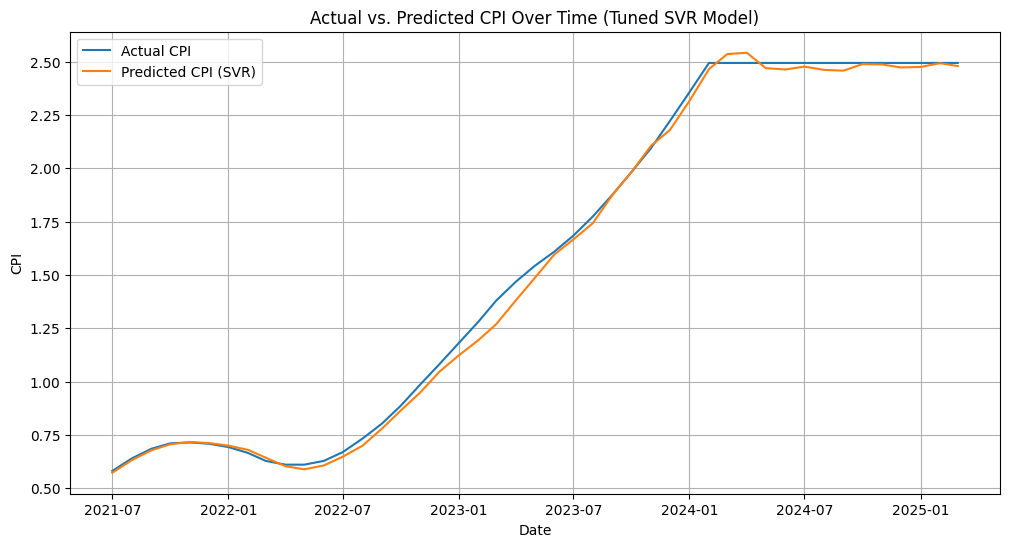

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# loading the actual CPI values from the test set
actual_cpi_test = y_test

# Getting the predicted CPI values for the tuned Ridge model on the test set
y_pred_tuned_ridge = best_ridge_model.predict(X_test)

# Getting the predicted CPI values for the tuned SVR model on the test set
y_pred_tuned_svr = best_svr_model.predict(X_test)

# Getting the corresponding dates for the test set
test_dates = df_featured_scaled['Date'][X_test.index]

# Created a DataFrame for plotting the Ridge model results
plot_data_ridge = pd.DataFrame({
    'Date': test_dates,
    'Actual CPI': actual_cpi_test,
    'Predicted CPI (Ridge)': y_pred_tuned_ridge
})

# Create a DataFrame for plotting the SVR model results
plot_data_svr = pd.DataFrame({
    'Date': test_dates,
    'Actual CPI': actual_cpi_test,
    'Predicted CPI (SVR)': y_pred_tuned_svr
})

# Plotting Actual vs. Predicted CPI for Ridge Model
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data_ridge, x='Date', y='Actual CPI', label='Actual CPI')
sns.lineplot(data=plot_data_ridge, x='Date', y='Predicted CPI (Ridge)', label='Predicted CPI (Ridge)')
plt.title('Actual vs. Predicted CPI Over Time (Tuned Ridge Model)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Actual vs. Predicted CPI for SVR Model
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data_svr, x='Date', y='Actual CPI', label='Actual CPI')
sns.lineplot(data=plot_data_svr, x='Date', y='Predicted CPI (SVR)', label='Predicted CPI (SVR)')
plt.title('Actual vs. Predicted CPI Over Time (Tuned SVR Model)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()

Calculating residuals for tuned ridge model on testt set



In [33]:
# Calculated the predicted values for the test set using the best tuned Ridge model
y_pred_tuned_ridge = best_ridge_model.predict(X_test)

# Calculated the residuals for the Ridge model
residuals_ridge = y_test - y_pred_tuned_ridge

# Printing the first few residuals
print("First few residuals of the tuned Ridge model:")
print(residuals_ridge.head())

First few residuals of the tuned Ridge model:
180    0.001696
181    0.008824
182    0.011135
183    0.008823
184   -0.004368
Name: CPI, dtype: float64



Creating a time series plot of the residuals for the tuned Ridge model to check for autocorrelation.



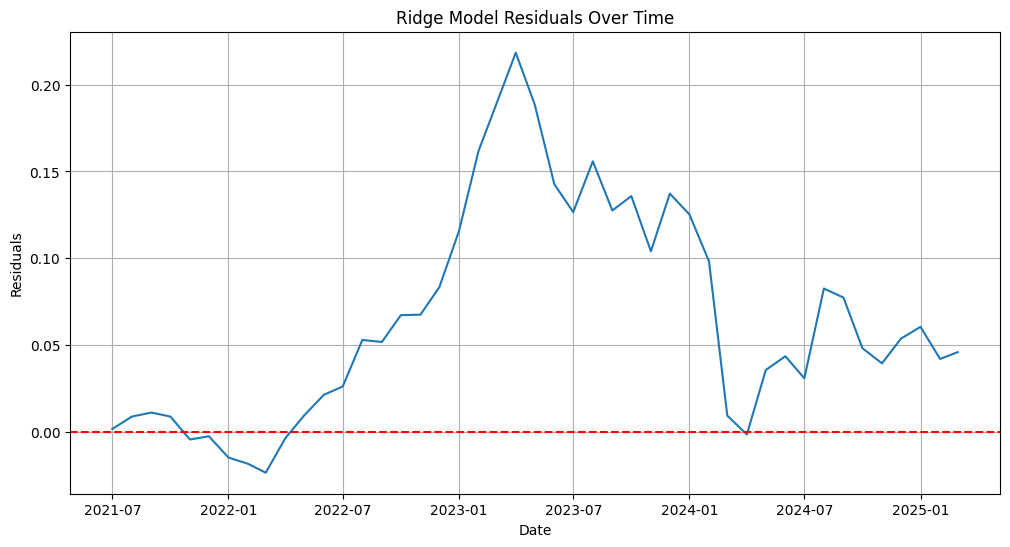

In [34]:
# Create a time series plot of the Ridge model residuals
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_featured_scaled['Date'][X_test.index], y=residuals_ridge)

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Label the axes and add a title
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Ridge Model Residuals Over Time')

# Add a grid
plt.grid(True)

# Display the plot
plt.show()


Checking for autocorrelation in the Ridge model residuals using an ACF plot.



<Figure size 1200x600 with 0 Axes>

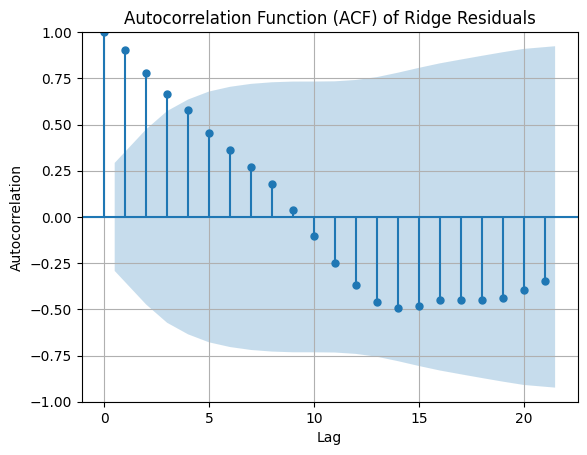

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

# Plotting the Autocorrelation Function (ACF) of the Ridge model residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals_ridge, lags=min(40, len(residuals_ridge) // 2 - 1), alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Ridge Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

Creating a histogram of the Ridge model residuals to visualize their distribution.



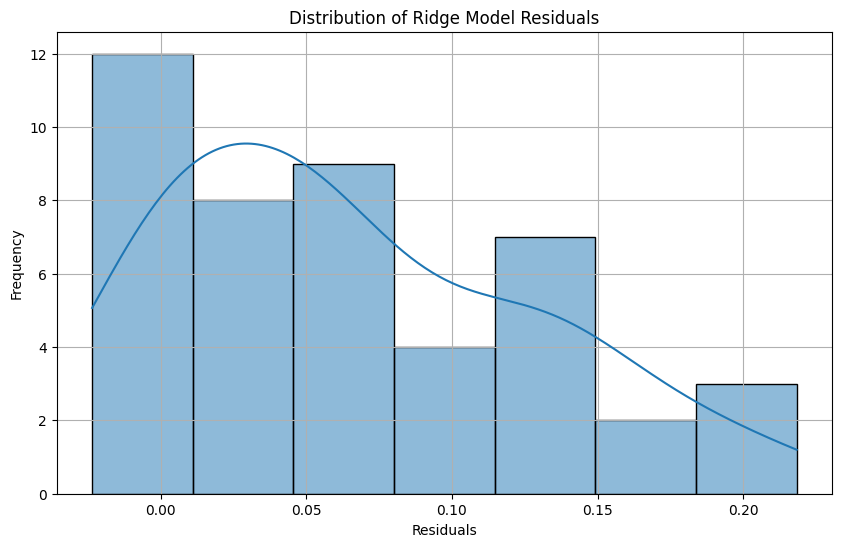

In [36]:
# Created a histogram of the Ridge model residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ridge, kde=True)
plt.title('Distribution of Ridge Model Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Created a histogram of the SVR model residuals to visualize their distribution.



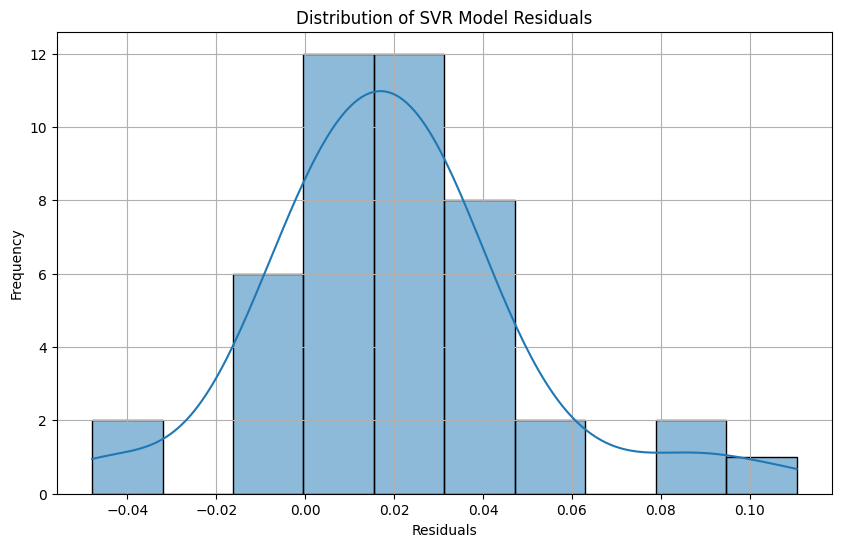

In [37]:
# Created a histogram of the SVR model residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_svr, kde=True)
plt.title('Distribution of SVR Model Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/tmp/ipython-input-368512806.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coefficients_full.index, y=sorted_coefficients_full.values, palette='viridis')


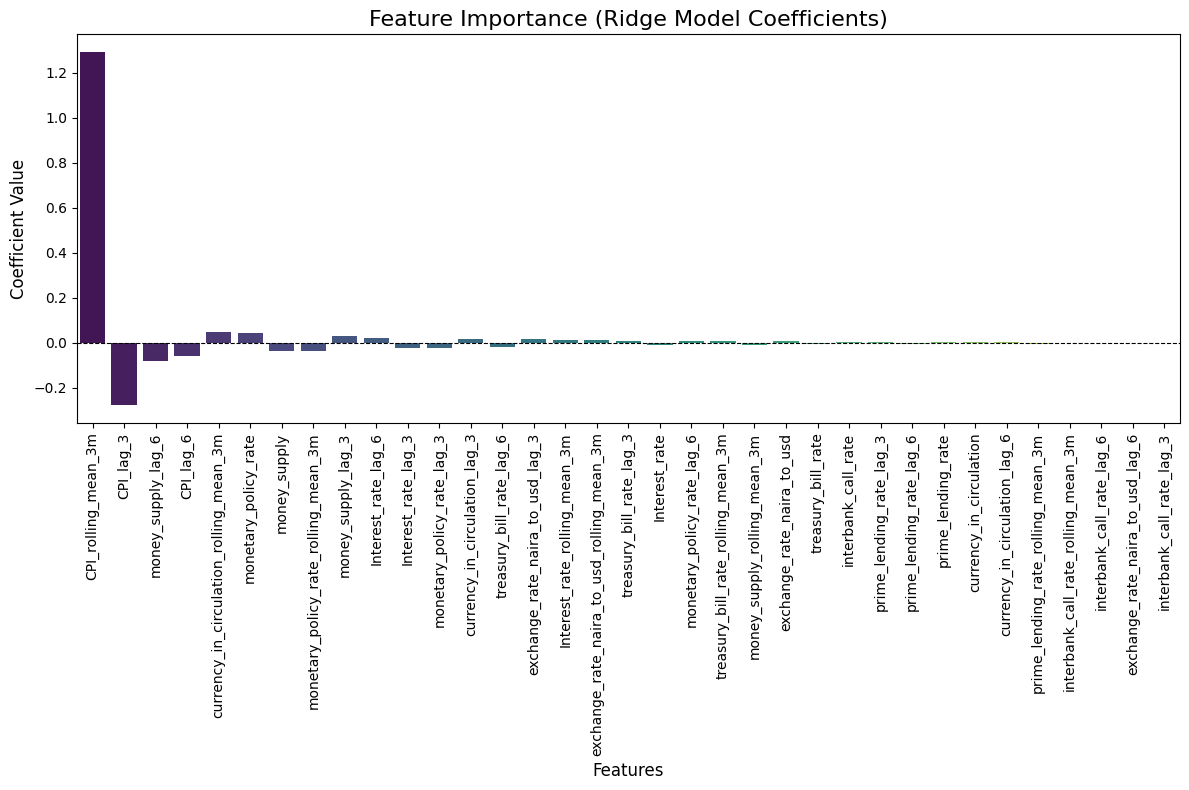

Tuned Ridge Model Coefficients (Sorted by Magnitude):
CPI_rolling_mean_3m                           1.293324
CPI_lag_3                                    -0.276403
money_supply_lag_6                           -0.082348
CPI_lag_6                                    -0.059893
currency_in_circulation_rolling_mean_3m       0.048612
monetary_policy_rate                          0.045233
money_supply                                 -0.037484
monetary_policy_rate_rolling_mean_3m         -0.035098
money_supply_lag_3                            0.031662
Interest_rate_lag_6                           0.023011
Interest_rate_lag_3                          -0.020659
monetary_policy_rate_lag_3                   -0.020527
currency_in_circulation_lag_3                 0.018036
treasury_bill_rate_lag_6                     -0.016457
exchange_rate_naira_to_usd_lag_3              0.016166
Interest_rate_rolling_mean_3m                 0.013020
exchange_rate_naira_to_usd_rolling_mean_3m    0.012725
treasury_bi

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the coefficients from the tuned Ridge model
ridge_coefficients = best_ridge_model.coef_

# Get the names of the features (excluding 'Date' and 'CPI')
feature_names = X_train.columns

# Create a pandas Series for easier handling and plotting
coefficients_series = pd.Series(ridge_coefficients, index=feature_names)

# Sort the coefficients by magnitude
sorted_coefficients = coefficients_series.abs().sort_values(ascending=False)

# Reindex the coefficients series based on the sorted order for plotting
sorted_coefficients_full = coefficients_series[sorted_coefficients.index]

# Create a bar plot of the sorted coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_coefficients_full.index, y=sorted_coefficients_full.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add titles and labels
plt.title('Feature Importance (Ridge Model Coefficients)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)

# Add a horizontal line at y=0 to distinguish positive and negative coefficients
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

# Print the sorted coefficients
print("Tuned Ridge Model Coefficients (Sorted by Magnitude):")
print(sorted_coefficients_full)